Kriteria Submission

1.   Dataset yang dipakai haruslah dataset berikut : rockpaperscissors, atau gunakan link ini pada wget command: https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
2.   Dataset harus dibagi menjadi train set dan validation set.
3.   Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
4.   Harus mengimplementasikan augmentasi gambar.
5.   Menggunakan image data generator.
6.   Model harus menggunakan model sequential.
7.   Pelatihan model tidak melebihi waktu 30 menit.
8.   Program dikerjakan pada Google Colaboratory.
9.   Akurasi dari model minimal 85%.
10.  Dapat memprediksi gambar yang diunggah ke Colab

# Load Dataset

In [38]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [39]:
 !wget --no-check-certificate \
   https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
   -O /tmp/rps.zip

--2021-04-24 06:37:06--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 307.92M  1018KB/s    in 5m 6s   

2021-04-24 06:42:12 (1.01 MB/s) - ‘/tmp/rps.zip’ saved [322873683/322873683]



In [40]:

# melakukan ekstraksi pada file zip
import zipfile

tmp_zip = '/tmp/rps.zip'

rps_zip = zipfile.ZipFile(tmp_zip, 'r')
rps_zip.extractall('/content/drive/My Drive')
rps_zip.close()

In [41]:
import os

In [42]:
os.listdir('/content/drive/My Drive/rockpaperscissors/rps-cv-images')

['rock', 'scissors', 'README_rpc-cv-images.txt', 'paper']

-Pembagian Data- <br>
Menentukan direktori penyimpanan seluruh dataset 

In [43]:
!pip install split-folders

In [44]:
import splitfolders
root_dir = '/content/drive/My Drive/rockpaperscissors/rps-cv-images'
splitfolders.ratio(root_dir, output = "/content/drive/My Drive/rockpaperscissors", ratio = (.6, .4))

train_dir = os.path.join("/content/drive/My Drive/rockpaperscissors", "train")
validation_dir = os.path.join("/content/drive/My Drive/rockpaperscissors", "val")

Copying files: 2188 files [00:01, 1903.74 files/s]


In [45]:
os.listdir(root_dir)

['rock', 'scissors', 'README_rpc-cv-images.txt', 'paper']

Menentukan direktori penyimpanan masing-masing label

In [49]:
batu_dir = os.path.join(root_dir, 'rock')
kertas_dir = os.path.join(root_dir, 'paper')
gunting_dir = os.path.join(root_dir, 'scissors')

In [50]:
batu_dir

'/content/drive/My Drive/rockpaperscissors/rps-cv-images/rock'

Pengecekan file untuk memastikan file sudah terunduh dengan baik

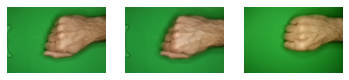

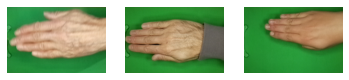

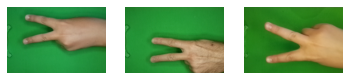

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for f in [batu_dir, kertas_dir, gunting_dir]:
    for i in range(3):
        sp = plt.subplot(1, 3, i + 1)
        sp.axis('Off')
        img = mpimg.imread(f + "/" + os.listdir(f)[i])
        plt.imshow(img)
    plt.show()

Pemecahan pembagian data dan Inisialisasi path data train dan validation
<br> Pada tahap ini, Dataset juga dibagi menjadi 60% Data Train dan 40% Data Validation

In [52]:
from sklearn.model_selection import train_test_split

kertas_train, kertas_val = train_test_split(os.listdir(kertas_dir), test_size = 0.4, train_size = 0.6)

batu_train, batu_val = train_test_split(os.listdir(batu_dir), test_size = 0.4, train_size = 0.6)

gunting_train, gunting_val = train_test_split(os.listdir(gunting_dir), test_size = 0.4, train_size = 0.6)

In [53]:
train_kertas = os.path.join(train_dir, 'kertas')
train_batu = os.path.join(train_dir, 'batu')
train_gunting = os.path.join(train_dir, 'gunting')

validation_kertas = os.path.join(validation_dir, 'kertas')
validation_batu = os.path.join(validation_dir, 'batu')
validation_gunting = os.path.join(validation_dir, 'gunting')

# Preprocessing

Augmentasi gambar dengan mengubah skala menjadi 1/255 dan menerapkan horizontal serta vertical flip. 

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [55]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   rotation_range = 20,  
                                   shear_range=0.2, 
                                   horizontal_flip= True, 
                                   fill_mode='nearest')

In [56]:
test_datagen = ImageDataGenerator(rescale = 1/255, 
                                   rotation_range = 20, 
                                   shear_range=0.2, 
                                   horizontal_flip= True, 
                                   fill_mode='nearest')

Mempersiapkan data train dan data validation yang akan dipelajari oleh model

In [57]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 300),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 300),
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [67]:
cek_generator = train_datagen.flow_from_directory(
        root_dir,
        target_size=(200, 300),
        batch_size=128,
        class_mode='categorical',
        subset='training')

Found 2188 images belonging to 3 classes.


Pengecekan untuk mengetahui nilai variabel y untuk setiap label rock, paper, dan scissors

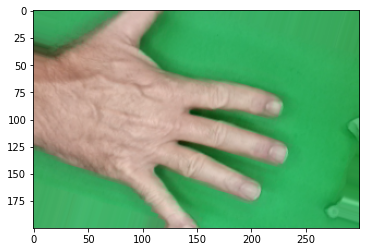

[1. 0. 0.]


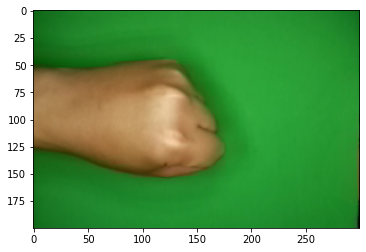

[0. 1. 0.]


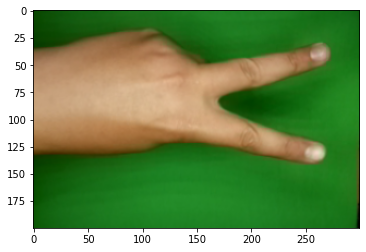

[0. 0. 1.]


In [68]:
x, y = cek_generator.next()
plt.imshow(x[0])
plt.show()
print(y[0])

plt.imshow(x[1])
plt.show()
print(y[1])

plt.imshow(x[2])
plt.show()
print(y[2])

# Modelling

Pembuatan dan pelatihan model neural network

In [85]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')                            
])

In [86]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0015)
model.compile(loss='categorical_crossentropy'
              ,optimizer=adam
              ,metrics=['accuracy'])

In [87]:
import time
time_array = []

start_time = time.time()
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // validation_generator.batch_size,
      verbose=1)

print("--- %.2f menit ---" % ((time.time() - start_time)/60))
time_array.append(time.time() - start_time)

Epoch 1/10
41/41 [==============================] - 113s 3s/step - loss: 1.0343 - accuracy: 0.4196 - val_loss: 0.4073 - val_accuracy: 0.8542
Epoch 2/10
41/41 [==============================] - 112s 3s/step - loss: 0.3151 - accuracy: 0.8926 - val_loss: 0.2718 - val_accuracy: 0.9329
Epoch 3/10
41/41 [==============================] - 112s 3s/step - loss: 0.1533 - accuracy: 0.9424 - val_loss: 0.1363 - val_accuracy: 0.9676
Epoch 4/10
41/41 [==============================] - 113s 3s/step - loss: 0.0996 - accuracy: 0.9637 - val_loss: 0.0797 - val_accuracy: 0.9745
Epoch 5/10
41/41 [==============================] - 112s 3s/step - loss: 0.0605 - accuracy: 0.9807 - val_loss: 0.0773 - val_accuracy: 0.9757
Epoch 6/10
41/41 [==============================] - 113s 3s/step - loss: 0.0945 - accuracy: 0.9698 - val_loss: 0.0938 - val_accuracy: 0.9711
Epoch 7/10
41/41 [==============================] - 112s 3s/step - loss: 0.0802 - accuracy: 0.9688 - val_loss: 0.0883 - val_accuracy: 0.9780
Epoch 8/10
41

Visualisasi accuracy dan loss pada tiap epoch

In [88]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    print("Training Accuracy: %.2f" % acc[-1])
    print("Training Loss: %.2f" % loss[-1])
    print("Validation Accuracy: %.2f" % val_acc[-1])
    print("Validation Loss: %.2f" % val_loss[-1] + '\n\n')

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc, 'b', label='Train acc')
    plt.plot(val_acc, 'r', label='Validation acc')
    plt.title('Train and validation accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(loss, 'b', label='Train loss')
    plt.plot(val_loss, 'r', label='Validation loss')
    plt.title('Train and validation loss')
    plt.legend()

Training Accuracy: 0.99
Training Loss: 0.04
Validation Accuracy: 0.98
Validation Loss: 0.07




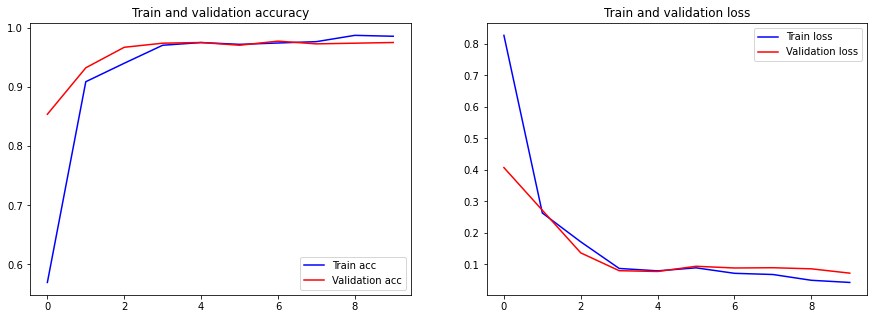

In [89]:
plot_history(history)

# Prediction

Prediksi gambar file yang diunggah dari komputer - Prediksi Data Gambar Kertas

In [74]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
%matplotlib inline

Saving kertas-bgputih.jpg to kertas-bgputih (1).jpg


Nama file kamu adalah: kertas-bgputih.jpg
Kamu telah mengeluarkan kertas


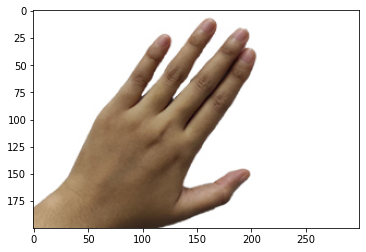

In [75]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  y_classes = classes.argmax(axis=-1)


  print('\n\nNama file kamu adalah: ' + fn)
  if y_classes==0:
    print('Kamu telah mengeluarkan kertas')
  elif y_classes==1:
    print('Kamu telah mengeluarkan batu')
  else:
    print('Kamu telah mengeluarkan gunting')


Saving kertas-ijo.jpg to kertas-ijo (3).jpg


Nama file kamu adalah: kertas-ijo.jpg
Kamu telah mengeluarkan kertas


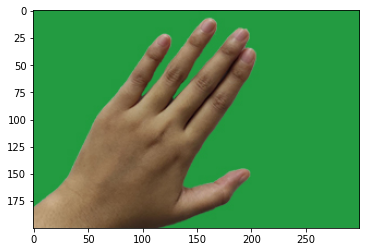

In [76]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  y_classes = classes.argmax(axis=-1)


  print('\n\nNama file kamu adalah: ' + fn)
  if y_classes==0:
    print('Kamu telah mengeluarkan kertas')
  elif y_classes==1:
    print('Kamu telah mengeluarkan batu')
  else:
    print('Kamu telah mengeluarkan gunting')


Saving kertas-11-bebas.jpg to kertas-11-bebas (2).jpg


Nama file kamu adalah: kertas-11-bebas.jpg
Kamu telah mengeluarkan kertas


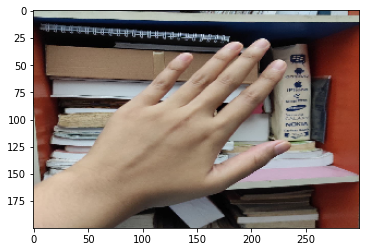

In [77]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  y_classes = classes.argmax(axis=-1)


  print('\n\nNama file kamu adalah: ' + fn)
  if y_classes==0:
    print('Kamu telah mengeluarkan kertas')
  elif y_classes==1:
    print('Kamu telah mengeluarkan batu')
  else:
    print('Kamu telah mengeluarkan gunting')


Prediksi Data Gambar Gunting

Saving gunting-ijo.jpg to gunting-ijo.jpg


Nama file kamu adalah: gunting-ijo.jpg
Kamu telah mengeluarkan gunting


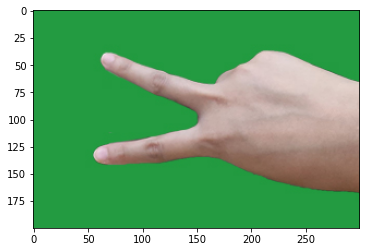

In [78]:
# Gambar dengan latar belakang hijau

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  y_classes = classes.argmax(axis=-1)


  print('\n\nNama file kamu adalah: ' + fn)
  if y_classes==0:
    print('Kamu telah mengeluarkan kertas')
  elif y_classes==1:
    print('Kamu telah mengeluarkan batu')
  else:
    print('Kamu telah mengeluarkan gunting')


Saving gunting-bgputih.jpg to gunting-bgputih (1).jpg


Nama file kamu adalah: gunting-bgputih.jpg
Kamu telah mengeluarkan kertas


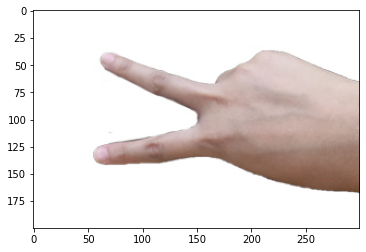

In [79]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  y_classes = classes.argmax(axis=-1)


  print('\n\nNama file kamu adalah: ' + fn)
  if y_classes==0:
    print('Kamu telah mengeluarkan kertas')
  elif y_classes==1:
    print('Kamu telah mengeluarkan batu')
  else:
    print('Kamu telah mengeluarkan gunting')


Prediksi Data Gambar Batu

Saving batu-ijo.jpg to batu-ijo (5).jpg


Nama file kamu adalah: batu-ijo.jpg
Kamu telah mengeluarkan kertas


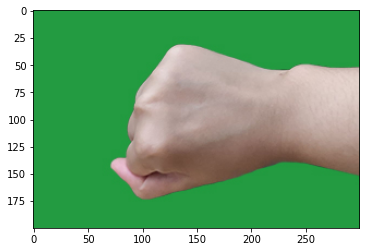

In [90]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  y_classes = classes.argmax(axis=-1)


  print('\n\nNama file kamu adalah: ' + fn)
  if y_classes==0:
    print('Kamu telah mengeluarkan kertas')
  elif y_classes==1:
    print('Kamu telah mengeluarkan batu')
  else:
    print('Kamu telah mengeluarkan gunting')


Saving batu.jpg to batu (2).jpg


Nama file kamu adalah: batu.jpg
Kamu telah mengeluarkan kertas


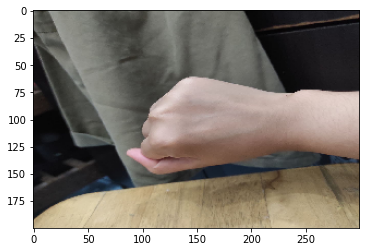

In [81]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  y_classes = classes.argmax(axis=-1)


  print('\n\nNama file kamu adalah: ' + fn)
  if y_classes==0:
    print('Kamu telah mengeluarkan kertas')
  elif y_classes==1:
    print('Kamu telah mengeluarkan batu')
  else:
    print('Kamu telah mengeluarkan gunting')


# Summary

1.   Model memiliki akurasi train sebesar ~97% dan akurasi validation sebesar ~95%.
2.   Optimizer Adam tetap digunakan namun dengan pengubahan learning rate karena penggunaan SGD dan RMSProp di kasus ini menyebabkan training tidak stabil.
3.   Karena seluruh dataset memiliki latar belakang hijau, dataset kurang cakap dalam memprediksi gambar yang memiliki latar belakang warna lain.
4.   Pada dataset kertas, model dapat memprediksi dengan baik pada gambar berlatar belakangan hijau maupun pada dataset berlatar belakang putih (dengan pengambilan posisi gambar berbeda dari sample dataset yang disediakan).
5.   Namun, berdasarkan percobaan yang sudah dilakukan, posisi pengambilan gambar juga mempengaruhi jika posisi gambar berbeda dari sample dataset (dikarenakan model belajar dari data yang ada) yang mengakibatkan model tersebut akan menghasilkan prediksi gambar yang salah.
6.   Pada dataset gunting, model tidak cakap dalam mengenali data uji yang tidak berlatar belakang hijau
7.   Pada dataset batu, model tidak dapat mengenali gambar dengan baik, jika menggunakan dataset dari luar (bukan sample dataset yang diberikan) model akan salah memprediksi. Asumsi pengembang, hal tersebut dikarenakan, sample bentuk tangan (rock) masih kurang banyak sehingga belum dapat mengenali pola dengan baik pada beberapa bentuk tangan yang beragam.
8. Asumsi yang didapat, sample gambar yang digunakan pada pengujian harus mirip dengan sample gambar pada proses pelatihan, dari segi posisi pengambilan gambar sampai bentuk gambar yang ada di gambar, agar model cakap dalam memprediksi gambar.

# Profile

* Nama Lengkap: Niken Amelia
* No. HP: 0853 1132 1124
* Pekerjaan: Mahasiswa
* Email: niken.amelia123@gmail.com
* LinkedIn: https://www.linkedin.com/in/nikenamelia/